# Linear Algebra in Julia: Matrix Operations

## Creating Vectors and Matrices

In Julia, the building blocks for linear algebra are `Array`s. A one-dimensional `Array` serves as a **vector**, and a two-dimensional `Array` serves as a **matrix**. Let's create a few.

In [1]:
# A 3-element column vector with random entries from a standard normal distribution.
x = randn(3)

3-element Vector{Float64}:
 -0.7099718055947067
 -0.7242219885835591
 -0.8587018192007898

In [2]:
# A 3x3 matrix with random entries.
A = randn(3, 3)

3×3 Matrix{Float64}:
 -0.690369   1.84292   0.950913
  0.337259  -0.648844  0.0303967
  0.305039  -1.78971   0.233844

## Basic Operations with Vectors and Matrices

Julia provides a rich set of functions for linear algebra. While some basic operations are available by default, the majority are found in the `LinearAlgebra` standard library, which you should always include when doing this kind of work.

In [3]:
using LinearAlgebra

Element-wise addition, subtraction, and scalar multiplication work exactly as you'd expect from mathematics.

In [4]:
# Create another random vector y.
y = randn(3)

# This is a linear combination of vectors x and y.
x - 3y

3-element Vector{Float64}:
 -2.5506562888440034
 -4.477218710612392
 -1.4859694079556567

### Vector Multiplication: The Dot Product

It's important to distinguish between **linear algebra operations** (like the dot product) and **element-wise operations**. In Julia, `*` is reserved for mathematically defined multiplications. Trying to multiply two vectors with `*` will result in an error because the standard product is not defined for two column vectors.

To compute the **dot product** (or inner product), $x \cdot y = \sum_i x_i y_i$, you should use the `dot` function or Julia's convenient Unicode syntax `\cdot`.

In [5]:
# The standard function for the dot product.
x_dot_y_1 = dot(x, y)

# Julia's Unicode support allows for more mathematical notation. Type \cdot then press Tab.
x_dot_y_2 = x ⋅ y

-1.5211575516224867

For the special case of 3D vectors, Julia also provides the cross product.

In [6]:
# The cross product results in a vector orthogonal to both x and y.
x_cross_y = cross(x, y)

3-element Vector{Float64}:
  0.9228080440528985
 -0.3784189372538352
 -0.4438192274387065

### Vector Norms

The length or magnitude of a vector is calculated using a **norm**. The most common is the Euclidean norm, or $2$-norm:

$$ \|x\|_2 = \sqrt{\sum_{i=1}^n |x_i|^2} $$

This is computed with the `norm` function.

In [7]:
# Calculate the 2-norm of x using the built-in function.
a = norm(x)

# This should be the same as calculating it manually from the definition.
b = sqrt(sum(abs.(x).^2))

# The difference should be zero (or very close to it).
a - b

0.0

More generally, the `norm` function can compute the $p$-norm by passing `p` as a second argument:

$$ \|x\|_p = \left( \sum_{i=1}^n | x_i | ^p \right)^{1/p} $$

Common choices include `p=1` (the Manhattan norm) and `p=Inf` (the max norm).

## Matrix Multiplication

Matrix multiplication also uses the `*` operator. For a product $C = AB$ to be valid, the inner dimensions must match. If $A$ is $m \times k$ and $B$ is $k \times n$, the result $C$ will be $m \times n$.

$$ C_{ij} = \sum_{\ell=1}^k A_{i\ell} B_{\ell j} $$

Julia will throw a `DimensionMismatch` error if this condition is not met.

In [8]:
B = randn(4, 3)

# This is a valid multiplication: (4x3) * (3x3) results in a 4x3 matrix.
C = B * A

4×3 Matrix{Float64}:
  1.26925   -3.60259   -1.31844
  0.819065  -2.91981   -0.459862
 -0.303259   0.540966   1.0336
 -0.341198   0.732019   0.0661025

Again, it's vital not to confuse matrix multiplication (`*`) with element-wise multiplication (`.*`), which is also known as the Hadamard product.

In [9]:
# Matrix multiplication: A times A
AA = A * A

# Element-wise multiplication (Hadamard product)
A2 = A .* A

# The results are completely different!
AA - A2

3×3 Matrix{Float64}:
  0.911606  -7.56627   -1.28233
 -0.556133   0.567139   0.307165
 -0.835904  -1.89818    0.235664

### Matrix Powers
Similarly, the power operator `^` computes matrix powers, which implies repeated matrix multiplication.

In [10]:
# A^2 is equivalent to A * A.
A_pow_2 = A^2

# Fractional powers are also possible and are computed via eigendecomposition.
A_pow_3_5 = A^3.5

3×3 Matrix{ComplexF64}:
 -0.0478164-3.13888im   -0.0829017+8.00986im   -0.0491851+1.42529im
 -0.0163303+0.976179im   -0.048578-2.49104im  -0.00272934-0.443259im
 -0.0135316+1.40617im    0.0904273-3.58831im   -0.0929809-0.638509im

Note that Julia automatically returns a matrix of complex numbers when needed, even if the input matrix was real.

## Matrix Transpose

The **transpose** of a matrix swaps its rows and columns. A related operation is the **adjoint** (or conjugate transpose), which also takes the complex conjugate of each element. In Julia:
- `transpose(A)` performs the mathematical transpose.
- `A'` (a single quote) is convenient syntax for the **adjoint**.

For real-valued matrices, these two operations are identical.

In [11]:
# B is 4x3, so its transpose will be 3x4.
BT = transpose(B)

# For real matrices, the adjoint ' is the same as the transpose.
BT2 = B'

# This multiplication is now well-defined: (3x3) * (3x4) -> (3x4)
A * B'

3×4 Matrix{Float64}:
  2.13219    1.74975    0.972867   -1.54269
 -0.769408  -0.381786  -0.0900243   0.545165
 -1.14626   -0.496192  -0.779712    1.43837

Since the dot product can be written as $x^H y$ (the adjoint of $x$ times $y$), you can also use matrix multiplication syntax to compute it. This is a very common and efficient pattern.

In [12]:
# x' (a 1x3 row vector) times y (a 3x1 column vector) gives a 1x1 matrix (a scalar).
x_dot_y_3 = x' * y

-1.5211575516224867

### A Note on 1D vs 2D Arrays

So far, our vectors (`x` and `y`) have been 1D arrays (`Vector`). It's also possible to create 2D arrays (`Matrix`) that have only one row or one column. This can be a subtle source of confusion!

In [13]:
# This is a 3x1 Matrix, representing a column vector.
a = randn(3, 1)

# This is a 1x3 Matrix, representing a row vector.
b = randn(1, 3)

1×3 Matrix{Float64}:
 0.909415  -0.945968  -0.817655

With these 2D objects, `a' * b` is now invalid due to a dimension mismatch (`(1x3) * (1x3)`). For this reason, it's often safer and clearer to use `dot()` when you intend to compute a dot product, as it works correctly regardless of whether the inputs are 1D or 2D.

In [14]:
# The dot function handles this case correctly and is the recommended approach.
a_dot_b = dot(a, b)

0.03530304016151467

## Other Common Matrix Functions

The `LinearAlgebra` package defines many other essential functions. Here are a few:

- `det(A)`: The determinant of a square matrix.
- `tr(A)`: The trace of a square matrix (the sum of its diagonal elements).
- `inv(A)`: The inverse of a square matrix.

**Important Note:** While `inv(A)` is available, explicitly calculating a matrix inverse is often inefficient and numerically unstable. For solving systems of linear equations like $Ax=b$, it is **always** better to use the backslash operator: `x = A \ b`.

In [15]:
A = randn(3, 3)
println("det(A) = ", det(A))
println("tr(A) = ", tr(A))
println("inv(A) = ", inv(A))

det(A) = 0.19713932375606386
tr(A) = -2.067933113700593
inv(A) = [3.4164086561646294 3.260715157468467 -2.1380911904702526; 1.9408249259207984 0.7556089928692074 -0.917955482070357; -2.8180642083959455 -2.8870899996214074 0.46327769015114584]


## Eigenvalues and Eigenvectors

For a square matrix $A$, an eigenvector $v$ and its corresponding eigenvalue $\lambda$ satisfy the equation $Av = \lambda v$. Eigen-analysis is fundamental to many areas of science and engineering. In Julia, you can compute them with `eigvals` and `eigvecs`.

Even for a real-valued matrix, its eigenvalues and eigenvectors can be complex numbers.

In [16]:
A = randn(3, 3)

# Returns a vector of eigenvalues.
lambda = eigvals(A)

3-element Vector{ComplexF64}:
 -0.07600927806260177 + 0.0im
   0.8552249129278493 - 0.17322012823475888im
   0.8552249129278493 + 0.17322012823475888im

In [17]:
# Returns a matrix whose columns are the corresponding eigenvectors.
X = eigvecs(A)

3×3 Matrix{ComplexF64}:
 0.562745+0.0im  -0.0913205+0.450763im  -0.0913205-0.450763im
 0.382509+0.0im  -0.0251692-0.140941im  -0.0251692+0.140941im
 0.732807+0.0im    0.876342-0.0im         0.876342+0.0im

In [18]:
# We can verify the fundamental relationship AX = XΛ, where Λ is a diagonal matrix of eigenvalues.
# The norm of the difference should be a very small number (close to machine precision).
norm(A*X - X*Diagonal(lambda))

4.451856111102413e-16

The `Diagonal` function used above is an example of a special, structured matrix type in Julia, which we will explore in the next section.

### Example: Eigenvalues of Random Matrices

Random matrix theory is a fascinating field that studies the properties of matrices with random entries. For example, **Girko's circular law** states that the eigenvalues of a large square matrix with entries drawn from a standard normal distribution will be concentrated inside a circle of radius $\sqrt{n}$ in the complex plane.

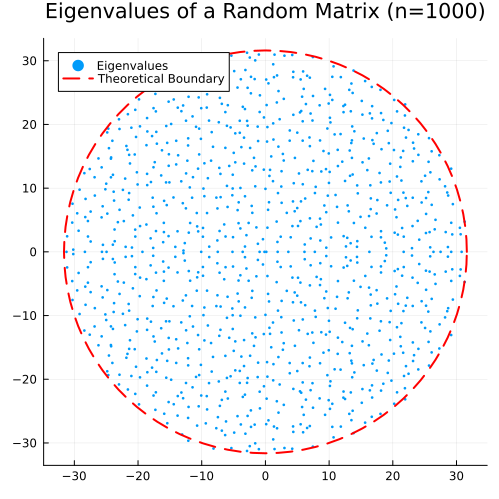

In [19]:
using Plots

# Define the size of the random matrix.
n = 1000

# Create the matrix and find its eigenvalues.
A = randn(n, n)
lambda = eigvals(A)

# Plot the real vs. imaginary parts of the eigenvalues as a scatter plot.
# The first plotting call also sets up the overall plot attributes.
scatter(real(lambda), imag(lambda),
        markersize = 1.5,
        markerstrokewidth = 0,
        label = "Eigenvalues",
        aspect_ratio = :equal,
        size = (500, 500),
        legend = :best,
        title = "Eigenvalues of a Random Matrix (n=$n)")

# Define the theoretical circle boundary.
radius = sqrt(n)
phi = range(0, 2π, length=101)

# Add the circle to the existing plot using plot!
plot!(radius * cos.(phi), radius * sin.(phi),
      linecolor = :red,
      linestyle = :dash,
      linewidth = 2,
      label = "Theoretical Boundary")

## Exact Linear Algebra with Rational Numbers

Beyond floating-point and complex numbers, many linear algebra operations are also defined for rational numbers. This allows for exact computations, free from floating-point rounding errors.

In [20]:
# Create a 3x3 matrix of numerators and denominators.
numerators = rand(-10:10, 3, 3)
denominators = rand(1:10, 3, 3)

# Use the element-wise rational constructor .// to create the matrix.
A_rat = numerators .// denominators
display(A_rat)

# The inverse will also be a matrix of exact rational numbers.
inv(A_rat)

3×3 Matrix{Rational{Int64}}:
 -4//3  5//3  -5//3
  1//3   1     10
  -8    6//7  -8//5

3×3 Matrix{Rational{Int64}}:
  1602//20899  -195//20899  -5775//41798
 12516//20899  1764//20899  -4025//41798
 -1305//20899  1920//20899    595//41798